In [345]:
import random
import math

class Matrix():
    def __init__(self, row=0, col=0, val=None, data=None):
        if data != None:
            self.row = len(data)
            self.col = len(data[0])
            self.data = [[val]*self.col for _ in range(self.row)]
            for i in range(self.row):
                for j in range(self.col):
                    self.data[i][j] = data[i][j] 
        else:
            self.row = row
            self.col = col
            if val != None:
                self.data = [[val]*self.col for _ in range(self.row)]
            else:
                self.data = [[0]*self.col for _ in range(self.row)]
            
    def random(self):
        for i in range(self.row):
            for j in range(self.col):
                self.data[i][j] = random.uniform(-1, 1)
                
    def get_col(self, col):
        m = Matrix(self.row, 1)
        for i in range(m.row):
            m.data[i][0] = self.data[i][col]
        return m
                
    def get_row_sum(self, row):
        s = 0
        for i in range(self.col):
            s += self.data[row][i]
        return s
            
    def dot(self, m):
        if self.col != 1 or m.col != 1 or self.row != m.row:
            raise Exception("Cannot take dot products. Two operands should be an equal size vectors")
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[i][j] = self.data[i][j] * m.data[i][j]
        return matrix
                
    def identity(self):
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                if i == j:
                    matrix.data[i][j] = 1
                else:
                    matrix.data[i][j] = 0
        return matrix
       
    def transpose(self):
        matrix = Matrix(self.col, self.row)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[j][i] = self.data[i][j]
        return matrix
    
    def transform(self, f, row=None, col=None):
        matrix = Matrix(self.row, self.col)
        if row != None:
            for i in range(self.row):
                for j in range(self.col):
                    if i == row:
                        matrix.data[i][j] = f(self.data[i][j])
                    else:
                        matrix.data[i][j] = self.data[i][j]
                
        elif col != None:
            for i in range(self.row):
                for j in range(self.col):
                    if j == col:
                        matrix.data[i][j] = f(self.data[i][j])
                    else:
                        matrix.data[i][j] = self.data[i][j]
                        
        else:
            for i in range(self.row):
                for j in range(self.col):
                    matrix.data[i][j] = f(self.data[i][j])
        
        return matrix
    
    def mul(self, m):
        if self.col != m.row:
            raise Exception("Number of columns of left matrix does not match number of rows of right matrix")
        matrix = Matrix(self.row, m.col)
        for i in range(matrix.row):
            for j in range(matrix.col):
                for k in range(self.col):
                    matrix.data[i][j] += self.data[i][k] * m.data[k][j]
        return matrix
    
    def scale(self, s, row=-1, col=-1):
        matrix = Matrix(self.row, self.col)
        if row != -1:
            for i in range(matrix.col):
                matrix.data[row][i] = self.data[row][i] * s
        elif col != -1:
            for i in range(matrix.row):
                matrix.data[i][col] = self.data[i][col] * s
        else:
            for i in range(matrix.row):
                for j in range(matrix.col):
                    matrix.data[i][j] = self.data[i][j] * s
        return matrix
        
    
    def add(self, m):
        if self.row != m.row or self.col != m.col:
            raise Exception("Number of rows and columns should match")
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[i][j] = self.data[i][j] + m.data[i][j]
        return matrix
    
    def sub(self, m):
        if self.row != m.row or self.col != m.col:
            raise Exception("Number of rows and columns should match")
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[i][j] = self.data[i][j] - m.data[i][j]
        return matrix
      
    def show(self):
        for i in range(self.row):
            print()
            for j in range(self.col):
                print(str(self.data[i][j]) + " ", end="")

In [364]:
# Single layer neural network
class NeuralNetwork():
    def __init__(self, input_layer, output_layer, alpha=1):
        self.num_input = input_layer
        self.num_output = output_layer
        self.alpha = alpha
        self.w = Matrix(output_layer, input_layer, 0.5)
        
    def sigmoid(self, x):
        return 1 / (1 + math.e**(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
        
    def train(self, input_data, output_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        output_m_list = [Matrix(data=[x]).transpose() for x in output_data]
        
        self.w.random()
        
        for _ in range(10000):
            
            for i in range(len(input_data)):
                
                input_m = input_m_list[i]
                desired_output_m = output_m_list[i]
                output_m = self.w.mul(input_m).transform(self.sigmoid)
                
                error_m = desired_output_m.sub(output_m)
                
                sigmoid_gradient_output_m = output_m.transform(self.sigmoid_derivative)
                
                error_m_dot_sigmoid_gradient_output_m = error_m.dot(sigmoid_gradient_output_m)
                
                alpha_dot_error_m_dot_sigmoid_gradient_output_m = error_m_dot_sigmoid_gradient_output_m.scale(self.alpha)
                
                adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(input_m.transpose())
                
                self.w = self.w.add(adjustment_m)
                
    def test(self, input_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        for i in range(len(input_m_list)):
            input_m = input_m_list[i]
            
            output_m = self.w.mul(input_m).transform(self.sigmoid)

            print(output_m.data)

In [365]:
# input_data = [[0, 0, 1]]
input_data = [[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]]

# input_data = [[0, 0, 1],
#               [1, 1, 1],
#               [1, 0, 1],
#               [0, 1, 1]]

outut_data = [[0], 
              [1], 
              [1], 
              [0]]

nn = NeuralNetwork(3, 1)
nn.train(input_data, outut_data)

In [366]:
nn.test([[1, 0, 1]])

[[0.9935909712125099]]


In [367]:
nn.w.data

[[9.67350957374386, -0.20783391464983167, -4.629891693790703]]

In [394]:
# Multi-layered neural network
class NeuralNetwork():
    def __init__(self, input_layer, hidden_layer, output_layer, alpha=0.1):
        self.num_input = input_layer
        self.num_hidden = hidden_layer
        self.num_output = output_layer
        self.alpha = alpha
        self.w0 = Matrix(hidden_layer, input_layer)
        self.w1 = Matrix(output_layer, hidden_layer)
        self.w0_history = []
        self.w1_history = []
        self.max_w = 0
        
    def sigmoid(self, x):
        return 1 / (1 + math.e**(-x))
        
        
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, input_data, output_data):
        
        self.w0.random()
        self.w1.random()
        
        self.w0_history = [self.w0]
        self.w1_history = [self.w1]
        
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        output_m_list = [Matrix(data=[x]).transpose() for x in output_data]
        
        
        
        for _ in range(60000):
            for i in range(len(input_m_list)):
#                 input_m = input_m_list[i]
#                 desired_output_m = output_m_list[i]
#                 output_m = self.w.mul(input_m).transform(self.sigmoid)
                
#                 error_m = desired_output_m.sub(output_m)
                
#                 sigmoid_gradient_output_m = output_m.transform(self.sigmoid_derivative)
                
#                 error_m_dot_sigmoid_gradient_output_m = error_m.dot(sigmoid_gradient_output_m)
                
#                 alpha_dot_error_m_dot_sigmoid_gradient_output_m = error_m_dot_sigmoid_gradient_output_m.scale(self.alpha)
                
#                 adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(input_m.transpose())
                
#                 self.w = self.w.add(adjustment_m)
                input_m = input_m_list[i]
                desired_output_m = output_m_list[i]
                
                hidden_output = self.w0.mul(input_m).transform(self.sigmoid)
                
                output_m = self.w1.mul(hidden_output).transform(self.sigmoid)
                
                error_m = desired_output_m.sub(output_m)
                
                sigmoid_gradient_output_m = output_m.transform(self.sigmoid_derivative)
                
                error_m_dot_sigmoid_gradient_output_m = error_m.dot(sigmoid_gradient_output_m)
                
                alpha_dot_error_m_dot_sigmoid_gradient_output_m = error_m_dot_sigmoid_gradient_output_m.scale(self.alpha)
                
                w1_adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(hidden_output.transpose())
                
                
                w1_transpose = self.w1.transpose()
#                 for i in range(w1_transpose.row):
#                     f = lambda x: x / w1_transpose.get_row_sum(i)
#                     w1_transpose = w1_transpose.transform(f, i)
                
                hidden_error_m = w1_transpose.mul(error_m)
                
                sigmoid_gradient_hidden_output_m = hidden_output.transform(self.sigmoid_derivative)
                
                hidden_error_m_dot_sigmoid_gradient_hidden_output_m = hidden_error_m.dot(sigmoid_gradient_hidden_output_m)
                
                alpha_hidden_error_m_dot_sigmoid_gradient_hidden_output_m = hidden_error_m_dot_sigmoid_gradient_hidden_output_m.scale(self.alpha)
                
                w0_adjustment_m = alpha_hidden_error_m_dot_sigmoid_gradient_hidden_output_m.mul(input_m.transpose())
                
                self.w1 = self.w1.add(w1_adjustment_m)
                self.w0 = self.w0.add(w0_adjustment_m)
                
                for i in range(self.w1.row):
                    for j in range(self.w1.col):
                        if self.w1.data[i][j] > self.max_w:
                            self.max_w = self.w1.data[i][j]
                            
                for i in range(self.w0.row):
                    for j in range(self.w0.col):
                        if self.w0.data[i][j] > self.max_w:
                            self.max_w = self.w0.data[i][j]
                
                
                self.w0_history.append(self.w1)
                self.w1_history.append(self.w0)
                

                
                
                
    def test(self, input_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        for i in range(len(input_m_list)):
            input_m = input_m_list[i]
            
            hidden_output_m = self.w0.mul(input_m).transform(self.sigmoid)
            
            output_m = self.w1.mul(hidden_output_m).transform(self.sigmoid)

            print(output_m.data)

In [395]:
# input_data = [[0, 0, 1]]
input_data = [[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [0, 1, 0],
              [1, 0, 0],
              [1, 1, 1],
              [0, 0, 0]]

# input_data = [[0, 0, 1],
#               [1, 1, 1],
#               [1, 0, 1],
#               [0, 1, 1]]

outut_data = [[0], 
              [1], 
              [1], 
              [1],
              [1],
              [0],
              [0]]


nn = NeuralNetwork(3, 4, 1)
nn.train(input_data, outut_data)

In [429]:
nn.test([[0, 0, 1]])

[[4.048686121732181e-05]]


In [402]:
nn.w0.data

[[-7.731407933513495, -7.676086624627905, 0.07040058545879012],
 [8.399464386098362, 8.37385257281542, -0.3679737078840224],
 [12.812524358442078, -7.527847086343268, 1.4519695514575326],
 [-7.215891355609266, 12.872857634612094, 1.0975466334697483]]

In [379]:
nn.w1.data

[[0.1734435004665912,
  -0.705230132166368,
  0.10814617804960273,
  1.373508477879756]]

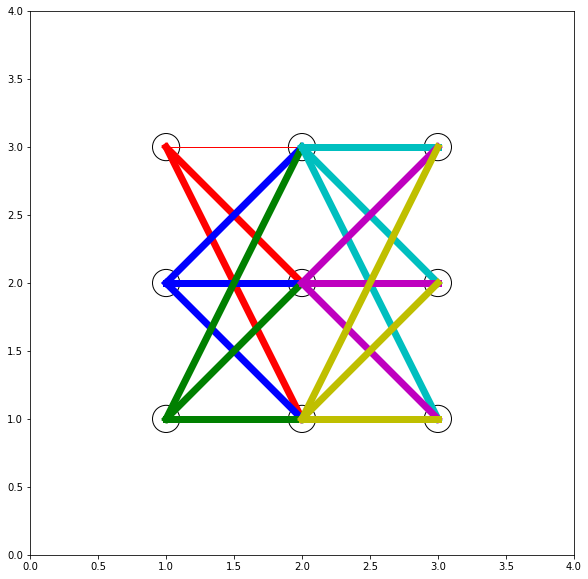

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111, aspect='equal')
ax2.add_patch(
    patches.Circle(
        (1, 1),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (1, 2),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (1, 3),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (2, 1),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (2, 2),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (2, 3),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (3, 1),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (3, 2),
        0.1,
        fill=False      # remove background
    )
)
ax2.add_patch(
    patches.Circle(
        (3, 3),
        0.1,
        fill=False      # remove background
    )
)

w0 = plt.plot([1, 2], [3, 3], c='r', linewidth=7.0)
w1 = plt.plot([1, 2], [3, 2], c='r', linewidth=7.0)
w2 = plt.plot([1, 2], [3, 1], c='r', linewidth=7.0)

w3 = plt.plot([1, 2], [2, 3], c='b', linewidth=7.0)
w4 = plt.plot([1, 2], [2, 2], c='b', linewidth=7.0)
plt.plot([1, 2], [2, 1], c='b', linewidth=7.0)

plt.plot([1, 2], [1, 3], c='g', linewidth=7.0)
plt.plot([1, 2], [1, 2], c='g', linewidth=7.0)
plt.plot([1, 2], [1, 1], c='g', linewidth=7.0)

plt.plot([2, 3], [3, 3], c='c', linewidth=7.0)
plt.plot([2, 3], [3, 2], c='c', linewidth=7.0)
plt.plot([2, 3], [3, 1], c='c', linewidth=7.0)

plt.plot([2, 3], [2, 3], c='m', linewidth=7.0)
plt.plot([2, 3], [2, 2], c='m', linewidth=7.0)
plt.plot([2, 3], [2, 1], c='m', linewidth=7.0)

plt.plot([2, 3], [1, 3], c='y', linewidth=7.0)
plt.plot([2, 3], [1, 2], c='y', linewidth=7.0)
plt.plot([2, 3], [1, 1], c='y', linewidth=7.0)

ax2.set_xlim((0, 4))
ax2.set_ylim((0, 4))

def animate(i):
    plt.setp(w0, linewidth=i)
    
ani = animation.FuncAnimation(fig2, animate, np.arange(1, 100), interval=1000)
# plt.show()

HTML(ani.to_html5_video())

# fig2.savefig('circle2.png', dpi=90, bbox_inches='tight')

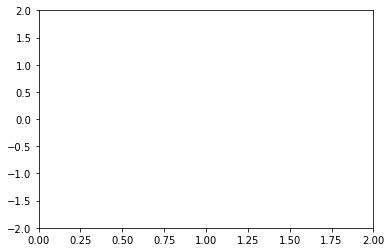

In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [15]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

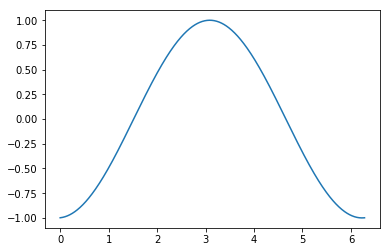

In [14]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 300), init_func=init,
                              interval=25, blit=True)
# plt.show()

from IPython.display import HTML
HTML(ani.to_html5_video())

In [6]:
np.arange(1, 200)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [430]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

class NeuralNetworkVisualizer():
    def __init__(self, input_layer, hidden_layer, output_layer):
        self.num_input = input_layer
        self.num_hidden = hidden_layer
        self.num_output = output_layer
        self.weights = []
        
        self.fig = plt.figure(figsize=(7,7))
        ax = self.fig.add_subplot(111, aspect='equal')
        
        for i in range(input_layer):
            ax.add_patch(patches.Circle((1, i+1), 0.1, fill=False))
        
        for i in range(hidden_layer):
            ax.add_patch(patches.Circle((2, i+1), 0.1, fill=False))
            
        for i in range(output_layer):
            ax.add_patch(patches.Circle((3, i+1), 0.1, fill=False))
            
        for i in range(hidden_layer):
            for j in range(input_layer):
                self.weights.append(plt.plot([1, 2], [input_layer-j, hidden_layer-i], c='r', linewidth=1.0))
                
        for i in range(output_layer):
            for j in range(hidden_layer):
                self.weights.append(plt.plot([2, 3], [hidden_layer-j, output_layer-i], c='r', linewidth=1.0))
            
        ax.set_xlim((0, 4))
        ax.set_ylim((0, 1+max(input_layer, hidden_layer, output_layer)))
        
    def animate(self, w):
        for i in range(len(self.weights)):
            plt.setp(self.weights[i], linewidth=w[i])
        
    def show(self, w0_history, w1_history):
        w_history = []
        for i in range(len(w0_history)):
            w = []
            w0 = w0_history[i]
            w1 = w1_history[i]
            for j in range(w0.row):
                for k in range(w0.col):
                    w.append(w0.data[j][k])
            for j in range(w1.row):
                for k in range(w1.col):
                    w.append(w1.data[j][k])
            w_history.append(w)
            
        ani = animation.FuncAnimation(self.fig, self.animate, w_history, interval=1000)
        HTML(ani.to_html5_video())

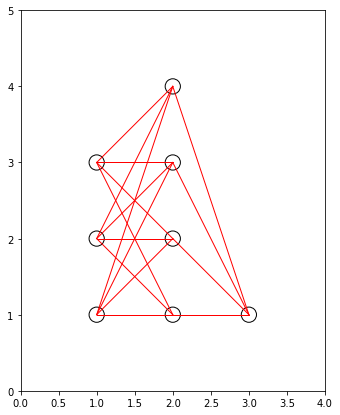

In [431]:
visualizer = NeuralNetworkVisualizer(nn.num_input, nn.num_hidden, nn.num_output)

In [432]:
# visualizer.show(nn.w0_history, nn.w1_history)

In [433]:
def animate(w):
    for i in range(len(visualizer.weights)):
        if w[i] > 0:
            plt.setp(visualizer.weights[i], c='r', linewidth=5*w[i]/nn.max_w)
        else:
            plt.setp(visualizer.weights[i], c='b', linewidth=-5*w[i]/nn.max_w)
        


w_history = []
for i in range(len(nn.w0_history)):
    w = []
    w0 = nn.w0_history[i]
    w1 = nn.w1_history[i]
    for j in range(w0.row):
        for k in range(w0.col):
            w.append(w0.data[j][k])
    for j in range(w1.row):
        for k in range(w1.col):
            w.append(w1.data[j][k])
    w_history.append(w)
    
w_history2 = []
print(len(w_history))
for i in range(len(w_history)):
    if i % 5000 == 0:
        w_history2.append(w_history[i])
        
print(w_history2[len(w_history2)-1])

ani = animation.FuncAnimation(visualizer.fig, animate, w_history2, interval=1000)
HTML(ani.to_html5_video())

420001
[-5.243313928355778, 12.119963011777555, -7.9212268668762364, -7.92137365784624, -7.731407933513495, -7.676086624627905, 0.07040058545879012, 8.399464386098362, 8.37385257281542, -0.3679737078840224, 12.812524358442078, -7.527847086343268, 1.4519695514575326, -7.215891355609266, 12.872857634612094, 1.0975466334697483]


In [420]:
nn.w0.data
[-5.243313928355778, 12.119963011777555, -7.9212268668762364, 
 -7.92137365784624, -7.731407933513495, -7.676086624627905, 
 0.07040058545879012, 8.399464386098362, 8.37385257281542, 
 -0.3679737078840224, 12.812524358442078, -7.527847086343268, 
 
 1.4519695514575326, -7.215891355609266, 12.872857634612094, 1.0975466334697483]

[[-7.731407933513495, -7.676086624627905, 0.07040058545879012],
 [8.399464386098362, 8.37385257281542, -0.3679737078840224],
 [12.812524358442078, -7.527847086343268, 1.4519695514575326],
 [-7.215891355609266, 12.872857634612094, 1.0975466334697483]]

In [415]:
nn.w1.data

[[-5.243313928355778,
  12.119963011777555,
  -7.9212268668762364,
  -7.92137365784624]]

In [328]:
class Matrix():
    def __init__(self):
        self.arrays = []
        self.row = 0
        self.col = 0
        
    def append(self, array):
        if len(self.arrays) == 0:
            self.col = len(array)
        if self.col != len(array):
            raise Exception("Invalid array size is passed. All the arrays should have the same size.")
        self.row += 1
        self.arrays.append(array)
        
    def mul(self, array):
        if self.col != len(array):
            raise Exception("Invalid array size is passed. Need to multiply by an array whose size is self.col")
            
        result = [0] * self.row
        for i in range(self.row):
            for j in range(self.col):
                result[i] += self.arrays[i][j] * array[j]
                
        return result
    
import math

class NeuralNetwork():
    def __init__(self, matrix, weight):
        if matrix.col != len(weight):
            raise Exception("Invalid size " + str(len(weight)) + " for the weight. The column size of the matrix " + str(matrix.col) + " should be the same as size of the weight.")
        self.matrix = matrix
        self.weight = weight
        
    def train(self, desired_output):
        if self.matrix.row != len(desired_output):
            raise Exception("Invalid size for desired output.")
                
        for i in range(10000):
            output = self.get_output()
            if i == 0:
                print(output)
                print(desired_output)
            for j in range(self.matrix.row):
                error = desired_output[j] - output[j]
                
                for k in range(self.matrix.col):
                    input = self.matrix.arrays[j][k]
                    adjust = error * input * self.sigmoid_derivative(output[j])
                    
                    self.weight[k] += adjust
    
    def sigmoid(self, x):
        return 1 / (1 + math.e**-x)
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def get_output(self):
        output = self.matrix.mul(self.weight)
        for i in range(len(output)):
            output[i] = self.sigmoid(output[i])
        return output
    
    def test(self, input):
        if len(self.weight) != len(input):
            raise Exception("Invalid size of input is passed. Size of input should match size of the weight")
        
        result = [0]*len(input)
        for i in range(len(input)):
            result[i] = self.weight[i] * input[i]
            
        sum = 0
        for i in range(len(result)):
            sum += result[i]
            
        output = self.sigmoid(sum)
                
        return output

In [329]:
training_set_inputs = [[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]
training_set_outputs = [0, 1, 1, 0]

matrix = Matrix()
matrix.append([0, 0, 1])
matrix.append([1, 1, 1])
matrix.append([1, 0, 1])
matrix.append([0, 1, 1])

weight = [0.5, 0.5, 0.5]

neural_network = NeuralNetwork(matrix, weight)
neural_network.train(training_set_outputs)

[0.6224593312018546, 0.8175744761936437, 0.7310585786300049, 0.7310585786300049]
[0, 1, 1, 0]


In [304]:
neural_network.weight

[9.672872840044812, -0.20828921048238266, -4.629310644146656]

In [313]:
neural_network.test([1, 0, 0])

0.9999370352685609

In [ ]:
# [[0.4424344780205667, 0.18854429207851303, 0.26293915806881096, 0.3407313623171441]]